In [1]:
# first we import os to use operating system functions
import os

In [2]:
#we set the working directory
os.chdir("C:/Users/17519")

In [3]:
print(os.getcwd())

C:\Users\17519


In [4]:
#now we import libraries to be used
import pandas as pd # for performing input/output functions and data analysis
import numpy as np  # for performing algebraic functions
import matplotlib.pyplot as plt # visualising data
import seaborn as sns # visualising data
from collections import Counter # for keeping the track of entries and data
from sklearn.tree import DecisionTreeRegressor # machine learning algorithms
from sklearn.ensemble import RandomForestRegressor # machine learning algorithms
from sklearn.linear_model import LinearRegression # machine learning algorithm
from sklearn.model_selection import train_test_split # for splitting the data 
from sklearn.metrics import mean_squared_error # for analysing the error
from sklearn.metrics import r2_score # for R^2 value
from pprint import pprint # output functioning
from sklearn.model_selection import GridSearchCV # parameter tuning

In [5]:
# before working on a data it is best to understand the data and hurdles to cross.
# we load the data to work on
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"}) # error in (1329) value of datetime
test   = pd.read_csv("test.csv")

In [6]:
# lets check the data
train.head() # preview of initial 5 rows of train data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
test.head() # preview of initial 5 rows of test data

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [10]:
# to check the types of data present in test and train data
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
# pickup datetime is not in proper format, fare amount has to be changed to numeric

In [12]:
# check the number of rows and columns 

print("training data entries : ",train.shape)

training data entries :  (16067, 7)


In [13]:
train.describe() # summary of train data, here we see some outliers in passenger count, lattitude...

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [14]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [15]:
# here also datetime format needs to be changed

In [16]:
print("test data entries : ",test.shape) # checking the number of rows and columns

test data entries :  (9914, 6)


In [17]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [18]:
# now we start cleaning the data and organising it
# fare amount will be changed to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  
# coerce will replace all non numeric error values to NaN 

In [19]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [20]:
#we clearly see fare amount has changed

In [21]:
# now we will convert pickup_datetime in proper format
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')


In [22]:
# we will seperate date time into subsets
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [23]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [24]:
# now the datetime and fare values are in desired form

In [25]:
train.dropna(subset= ["pickup_datetime"])   # dropping Na values in datetime

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,50.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0,35.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,2.0,17.0,22.0
8,NaN,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,2012.0,12.0,3.0,0.0,13.0,10.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0,11.0


In [27]:
# similar operation with test data
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [28]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [29]:
# basic observations
# some outliers are present in every column
# lattitude will range from -90 to 90
## longitude will range from  -180 to 180
# maximum passengers seating must not exceed 6 people

In [30]:
# checking the null values present in pickup_datetime
print(train['pickup_datetime'].isnull().sum())

1


In [31]:
# datetime missing values are dropped
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [32]:
# to observed some error in passenger count
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [33]:
# error in maximum value of passenger, maximum value should not be more than 6

In [34]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0) # dropping the values greater than 6

In [35]:
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0) # dropping the zero passenger count, empty cabs should'nt charge

In [36]:
train["passenger_count"].sort_values(ascending= True) # arranging the data in ascending order to check the lower samples

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
9793     1.00
9794     1.00
9795     1.00
9796     1.00
9797     1.00
9798     1.00
9801     1.00
9804     1.00
9806     1.00
9807     1.00
9808     1.00
9809     1.00
9811     1.00
9812     1.00
9814     1.00
9818     1.00
9819     1.00
9789     1.00
9788     1.00
9785     1.00
9784     1.00
9754     1.00
9756     1.00
9757     1.00
9758     1.00
         ... 
734       NaN
773       NaN
788       NaN
842       NaN
899       NaN
941       NaN
1361      NaN
1399      NaN
1400      NaN
1459      NaN
1748      NaN
1790      NaN
1851      NaN
1921      NaN
1984      NaN
1987      NaN
2104      NaN
2230      NaN
2378      NaN
7787      NaN
7805      NaN
7847      NaN
7892      NaN
7937      NaN
8007      NaN
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [37]:
print(train['passenger_count'].isnull().sum()) # checking the null values 

55


In [38]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0) # dropping the null values
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [39]:
train["passenger_count"].describe() # cross check

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [40]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape # lowest sample was found 0.12, so removing it as its an error

(15933, 13)

In [41]:
# lets check and change the longitude and lattitude values

In [42]:
##lattitude must range from(-90 to 90),Longitude must range from(-180 to 180)
#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]
# checking and removing values beyond this range

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [43]:
# drop this outcome


In [44]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [45]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180] # checking longitude outliers

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [46]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90] # checking dropping lattitude values

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [47]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180] # checking dropping longitude values

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [48]:
# no outliers found in pickup_longitude, dropoff_lattitude, dropoff_lattitude.

In [49]:
train.shape

(15932, 13)

In [50]:
train.isnull().sum() # checking nullvalues sum overall

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64

In [51]:
# fare amount needs to be cleaned
train["fare_amount"].sort_values(ascending=False)
#decending order will show the highest outliers and unequality present

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
1427         1.14
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
8             NaN
26            NaN
69            NaN
126           NaN
168           NaN
240           NaN
305           NaN
350           NaN
455           NaN
498           NaN
667           NaN
703           NaN
746           NaN
836           NaN
840           NaN
913           NaN
1123          NaN
1574          NaN
1628      

In [52]:
# we observe above 453 there are few values which are uneven and high, these will be treated as outliers,
##we need to remove them

In [53]:
Counter(train["fare_amount"]<0) # fare amount should be more than zero

Counter({False: 15929, True: 3})

In [54]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0) # lets drop outliers

In [55]:
# to check for presence of negative values
train["fare_amount"].min()

0.0

In [56]:
train = train.drop(train[train["fare_amount"]<1].index, axis=0) # removing the fare amount zero values
train.shape

(15927, 13)

In [57]:
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0) # fare amount in missing will be removed
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15903, 13)
0


In [58]:
train["fare_amount"].describe()

count    15903.000000
mean        15.065680
std        432.337347
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [59]:
# maximum value shows error, which needs to be dropped

In [60]:
# huge difference was observed in the highest fare values the outliers will be removed
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0) # after 453 values were very high so 454 limit is set
train.shape

(15901, 13)

In [61]:
train["fare_amount"].describe()

count    15901.000000
mean        11.376864
std         10.815059
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [62]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [63]:
test.isnull().sum() # test values were observed for no errors 

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [64]:
#data seems cleaned as needed
## now the distance needs to be calculated using the location co ordinates

In [65]:
from math import radians, cos, sin, asin, sqrt # lattitude and longitude will be used in haversine formula to calculate distance
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    ##The haversine formula determines the great-circle distance ,
    ## between two points on a sphere given their longitudes and latitudes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) ## decimals to degree radians
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    km = 6371* c ## earth's radius 6371 (approx)
    return km

In [66]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
# creating a new value distance out of given co- ordinates using haversine formula

In [67]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [68]:
# similar things must be done to test data
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [69]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [71]:
# as new value distance is created lets check for outliers in distance
## we will check in decending order to observe values uncertainity
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
7684        0.000000
4298        0.000000
13143       0.000000
3128        0.000000
8645        0.000000
8377        0.000000
4240        0.000000
2447        0.000000
4367        0.000000
11565       0.000000
13081       0.000000
13062       0.000000
4454        0.000000
13013       0.000000
13015       0.000000
808         0.000000
6462        0

In [72]:
## above 129 km values are too high, this could be removed to remove errors

In [73]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0) ## 130 is kept the upper limit of disttance.
train.shape

(15878, 14)

In [74]:
train.nunique()

fare_amount            459
pickup_datetime      15834
pickup_longitude     13660
pickup_latitude      14099
dropoff_longitude    13751
dropoff_latitude     14124
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15425
dtype: int64

In [75]:
test.nunique() # to return the number of unique elements

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [76]:
## lets check how many zero values are present in distance column of train and test data.
Counter(train['distance'] == 0)

Counter({False: 15424, True: 454})

In [77]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [78]:
train = train.drop(train[train['distance']== 0].index, axis=0) #distance value zero rows are removed
train.shape

(15424, 14)

In [79]:
Counter(train['fare_amount'] == 0)

Counter({False: 15424})

In [80]:
test = test.drop(test[test['distance']== 0].index, axis=0) #distance value zero rows are removed
test.shape

(9829, 13)

In [81]:
## as the distance is already calculated so now we dont need columns 
##like(pickup(lattitude,longitude), dropoff(lattitude,longitude))
## we can remove them as they are not required now and will be a clutter.
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)


In [82]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [83]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [84]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64') ## to change the variables into integers

In [85]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [86]:
## similar procedure with test data
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [88]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [89]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [90]:
## now we have the analysed data we needed 

### we now move to data visualisation 
##matplot.lib, seaborn library are used for it

In [91]:
## fare is a dependent variable.
## so we will check its dependence on various factors
# effect from passenger count
# day of the week
# time and date of pickup
# and distance effect on fares

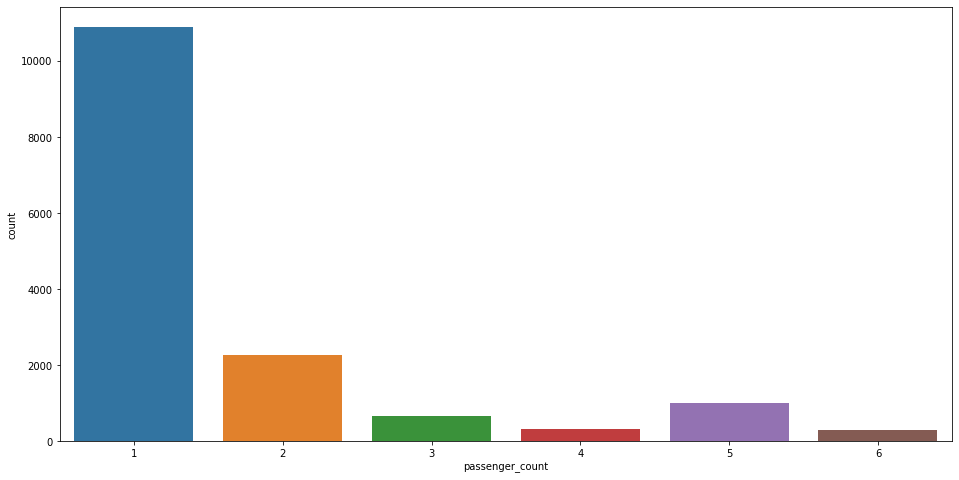

In [92]:
plt.figure(figsize=(16,8))
sns.countplot(x="passenger_count", data=train)
## this is a count plot of passenger count

In [93]:
## maximum number of passengers travel solo, then 2 passengers followed by 5 passengers

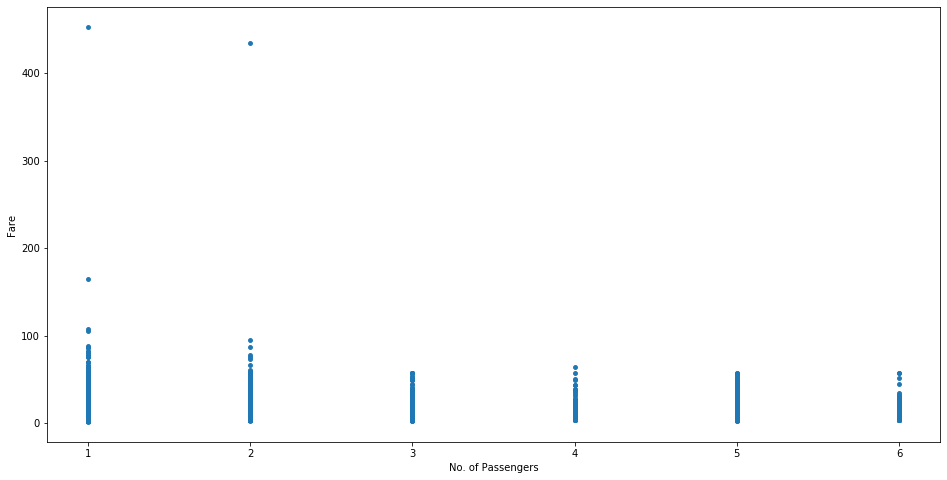

In [95]:
## scatter plot
plt.figure(figsize=(16,8))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show() ## effect of number of passengers on fare amount

In [96]:
## fares are high in case of solo (1)  and double(2) passengers

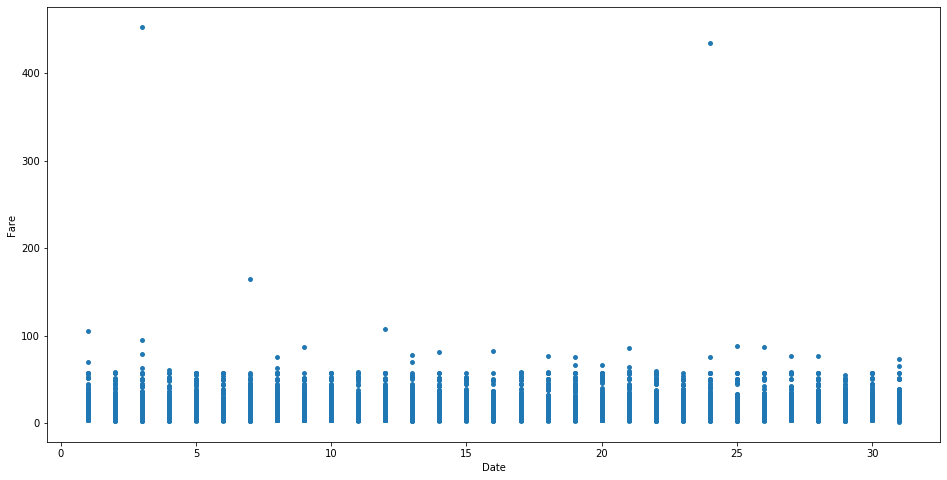

In [97]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=15)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show() ## effect of date and fare

In [98]:
## not much notable difference still on 3rd and 24th of the month fares were high

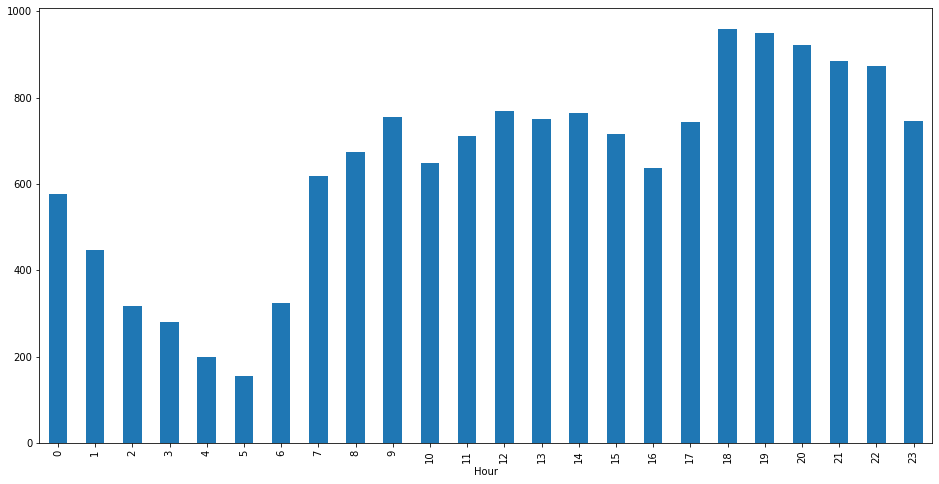

In [100]:
plt.figure(figsize=(16,8))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show() 

## lowest cabs are available at 5am, and maximum cabs are available at 6 pm, and around 6-9pm

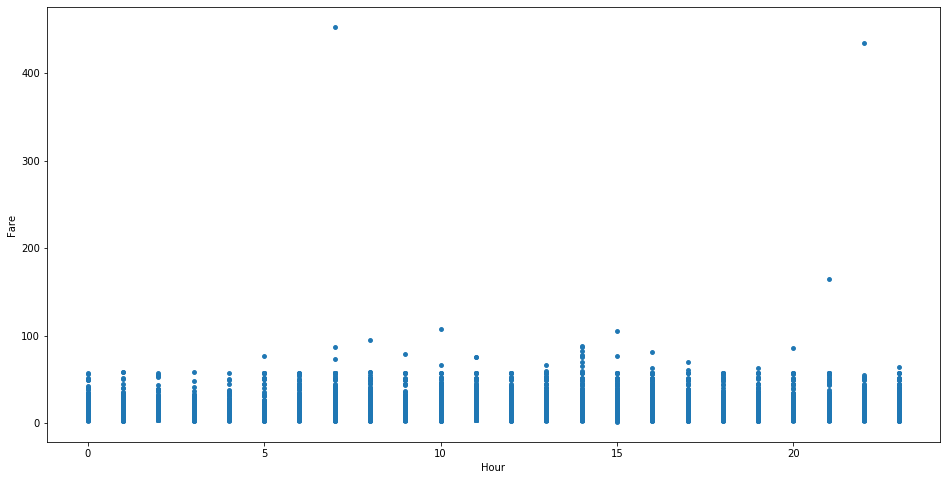

In [102]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=15)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show() ## effect of hour of day on fare

In [103]:
## cab fares are high at 7 am, and 22 pm 

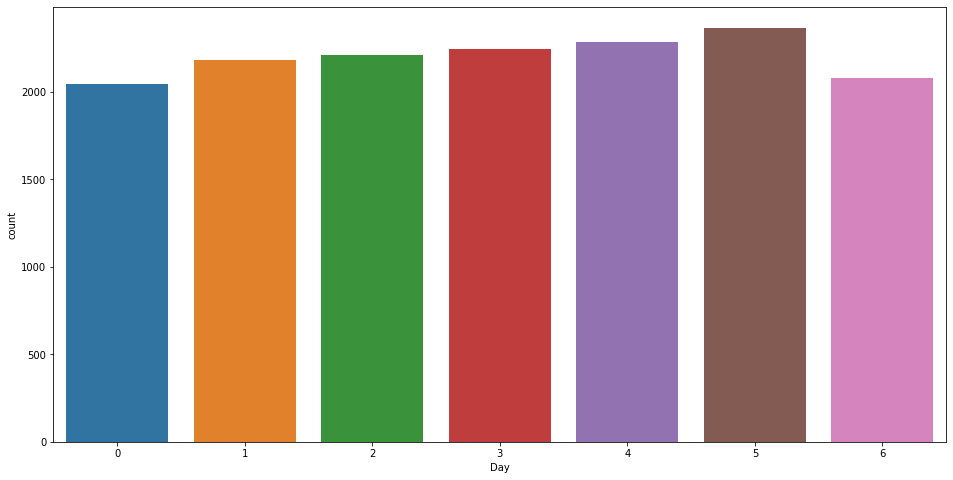

In [104]:
plt.figure(figsize=(16,8))
sns.countplot(x="Day", data=train)## effect of day on number of cabs

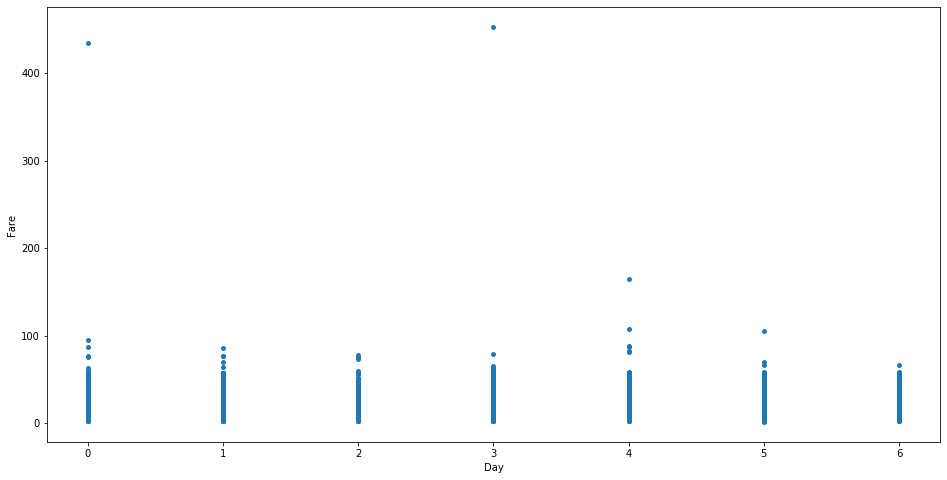

In [105]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=15)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()## effect of day on cabfares

In [106]:
### cab fares are observed high on sunday, monday and thursday, 
## and less fares on other days

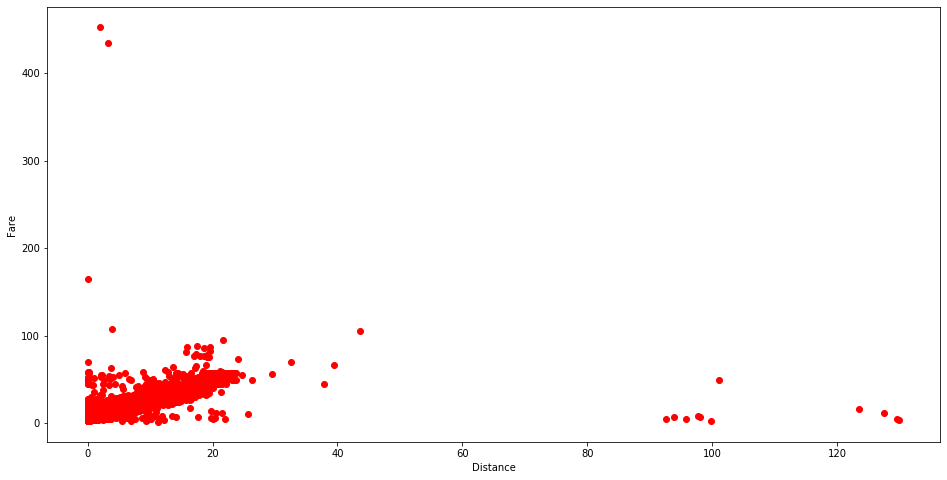

In [107]:
plt.figure(figsize=(16,8))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()
## effect of distance on fares through scatterplot

In [108]:
## fares will increase as distance increases

fare_amount


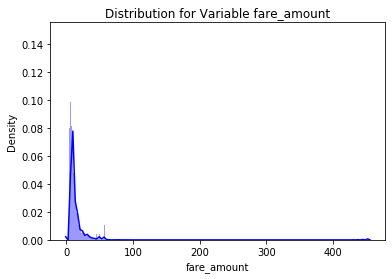

distance


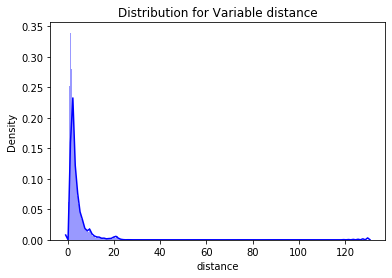

In [109]:
## now we do the feature scaling part before training the data
## to check the distribution of data normality check is performed
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [110]:
train['fare_amount'] = np.log1p(train['fare_amount'])
train['distance'] = np.log1p(train['distance'])
## skewness is very high, to lower the skewness log transform is applied

fare_amount


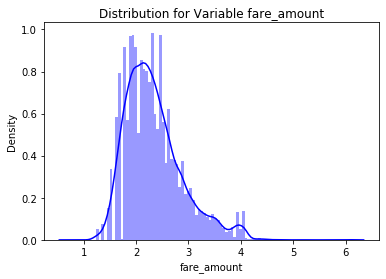

distance


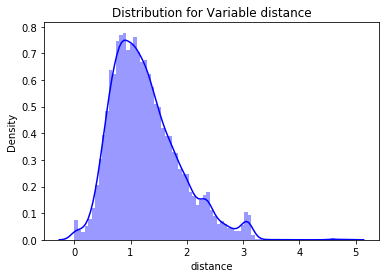

In [111]:
## observing the data again
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [112]:
## continous variables are uniformly distributed so no further process is needed in the dataset.

In [113]:
## similar procedure is done with the test data

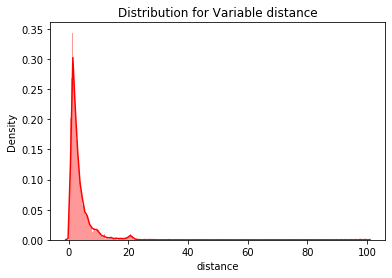

In [114]:
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

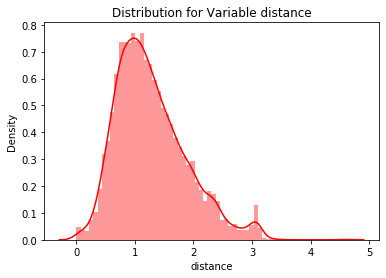

In [115]:
test['distance'] = np.log1p(test['distance'])## skewness is reduced
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [116]:
## test data is also normally distributed so no further processing is needed.

In [117]:
### we have processed the data now to fit machine learning algorithms, the data is divided or splitted.
## test and train data is split for modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [118]:
print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


In [142]:
## now as our data is splitted we will now we will build models on it
## we will use
## linear regression, rmse, r^2 values will be checked 
## decision tree 
## random forest
## result optimisation using gridsearch cross validation
## random search cross validation

In [121]:
## linear regression model

fit_LR = LinearRegression().fit(X_train , y_train)

In [122]:
## analysing and predicting results on test and train data

pred_train_LR = fit_LR.predict(X_train) ## on train data
pred_test_LR = fit_LR.predict(X_test) ## on test data

In [123]:
## to check the efficiency rmse and r^2 values are observed
## rmse should be lowest as possible 
## r^2 should be highest possible

In [124]:
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR)) ## rmse of train data
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR)) ## rmse of test data
print("Training data rmse = "+str(RMSE_train_LR)) ## print output of root mean squared error of test and train data
print("Test data rmse = "+str(RMSE_test_LR))

Training data rmse = 0.27531100179673135
Test data rmse = 0.24540661786977466


In [125]:
## now we calculate r^2 value using r_score
from sklearn.metrics import r2_score

In [126]:
r2_score(y_train, pred_train_LR) ## train data r^2

0.7495502651880406

In [127]:
r2_score(y_test, pred_test_LR) ## test data r^2

0.7827019104296646

In [128]:
## now we use decision tree model 
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train) 
# we set max depth =2 for the tree to flexibly learn from data

In [129]:
pred_train_DT = fit_DT.predict(X_train)
pred_test_DT = fit_DT.predict(X_test)
## predictions on test and train data

In [130]:
# calculating RMSE for train and test data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))
print("Training data rmse = "+str(RMSE_train_DT))
print("Test data rmse = "+str(RMSE_test_DT))

Training data rmse = 0.2996210902077019
Test data rmse = 0.2867460617158614


In [134]:
##calculating r^2 for train data
r2_score(y_train, pred_train_DT)

0.7033678616157003

In [135]:
## for test data
r2_score(y_test, pred_test_DT)

0.703326816766104

In [136]:
## now we try the random forest model
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [137]:
pred_train_RF = fit_RF.predict(X_train) ## predicting on train data

In [138]:
pred_test_RF = fit_RF.predict(X_test) ## predicting on test data

In [139]:
## rmse values for test and train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))
print("Training data rmse = "+str(RMSE_train_RF))
print("Test data rmse = "+str(RMSE_test_RF))

Training data rmse = 0.09584899531766607
Test data rmse = 0.2343831348722867


In [140]:
r2_score(y_train, pred_train_RF)
## r^2 for train data

0.9696437184141444

In [141]:
r2_score(y_test, pred_test_RF)
## r^2 for test data

0.8017851970219351

In [143]:
## we will try to get better results using parameter tuning through
# random search cross validation process 
# and grid search cross validation

In [144]:
# here we observed that the adequate and best performance is shown by random forest model
# so we will try to tune it a bit and check the performance

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [145]:
## now to check the parameters used in random forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [146]:
## random search cv on rondom forest

from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [147]:
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [148]:
rand_grid = {'n_estimators': n_estimator,'max_depth': depth} ## creating grid for random search

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

In [150]:
RRF_r2 = r2_score(y_test, predictions_RRF) ## r^2 value of RRf

In [151]:
## calculating rmse of RRf 
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.23730781853507238


In [152]:
## now we try gridsearch cross validation on random forest as its performance was optimum
from sklearn.model_selection import GridSearchCV 

In [154]:
rfgs = RandomForestRegressor(random_state = 0) ## rfgs = random forest grid search
n_estimator = list(range(11,20,1)) ## we took the range of 10 for less complexity and flexible tuning
depth = list(range(5,15,2))


In [155]:
grid_search = {'n_estimators': n_estimator,'max_depth': depth} ## creating the grid
# 5 fold cv gridsearch of random forest
gridcv_rf = GridSearchCV(rfgs, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_


In [156]:
predictions_GRF = gridcv_rf.predict(X_test) ## applying model on test data

In [157]:
GRF_r2 = r2_score(y_test, predictions_GRF) ## checking the R^2 value
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))## checking the rmse value

print('gridsearch cv on randomforest:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

gridsearch cv on randomforest:
Best Parameters =  {'max_depth': 7, 'n_estimators': 18}
R-squared = 0.8.
RMSE =  0.23637990451376567


In [158]:
##  now we will predict the results on the given test data
## from observations we see gridsearch cv on randomforest gave best results
## so we are implementing that on test data

In [159]:
rfgs = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [160]:
## for creating the grids
grid_search = {'n_estimators': n_estimator,'max_depth': depth}
gridcv_rf = GridSearchCV(rfgs, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_
## similar process as above

In [161]:
gridrf_predictions_df = gridcv_rf.predict(test) ## applying model on test data

In [162]:
gridrf_predictions_df 

array([2.36760025, 2.39383317, 1.6809062 , ..., 4.01224357, 3.29348722,
       2.0360277 ])

In [163]:
test['Predicted_fare'] = gridrf_predictions_df 

In [164]:
test.head(10)

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.367600
1,1,2015,1,27,1,13,1.231205,2.393833
2,1,2011,10,8,5,11,0.481579,1.680906
3,1,2012,12,1,5,21,1.085538,2.209257
4,1,2012,12,1,5,21,1.854312,2.815112
5,1,2012,12,1,5,21,1.440439,2.400284
6,1,2011,10,6,3,12,0.657313,1.820060
7,1,2011,10,6,3,12,3.115296,3.960913
8,1,2011,10,6,3,12,1.583907,2.463025
9,1,2014,2,18,1,15,0.741839,2.007261


In [165]:
test.to_csv('test_final.csv')